In [2]:
import pandas as pd
import os

In [3]:
def list_csv_files(directory):
    # List to hold csv file names
    csv_files = []
    
    # Iterate over files in the directory
    for filename in os.listdir(directory):
        # Check if the file is a CSV
        if filename.endswith('.csv'):
            csv_files.append(filename)
    
    return csv_files


folder_path = '/Users/rachels/Desktop/NUS/Y4/dsa4266/Phishing data'
csv_files = list_csv_files("/Users/rachels/Desktop/NUS/Y4/dsa4266/Phishing data")
csv_files

['Nazario_5.csv',
 'Nigerian_Fraud.csv',
 'Ling.csv',
 'TREC_05.csv',
 'TREC_06.csv',
 'TREC_07.csv',
 'Nazario.csv',
 'SpamAssasin.csv',
 'CEAS_08.csv',
 'Nigerian_5.csv',
 'Enron.csv']

In [4]:
for file in csv_files:
    if 'TREC' in file:
        continue
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    print(file)
    print(df.shape)
    print(df.columns)
    # print(df.head(1))

Nazario_5.csv
(3065, 7)
Index(['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls'], dtype='object')
Nigerian_Fraud.csv
(3332, 7)
Index(['sender', 'receiver', 'date', 'subject', 'body', 'urls', 'label'], dtype='object')
Ling.csv
(2859, 3)
Index(['subject', 'body', 'label'], dtype='object')
Nazario.csv
(1565, 7)
Index(['sender', 'receiver', 'date', 'subject', 'body', 'urls', 'label'], dtype='object')
SpamAssasin.csv
(5809, 7)
Index(['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls'], dtype='object')
CEAS_08.csv
(39154, 7)
Index(['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls'], dtype='object')
Nigerian_5.csv
(6331, 7)
Index(['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls'], dtype='object')


/var/folders/r7/7xn5t9gj65x3tw58b7rmvtmm0000gn/T/ipykernel_13860/4199423972.py:5: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,2

Enron.csv
(49152, 423)
Index(['subject', 'body', 'label', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 413', 'Unnamed: 414', 'Unnamed: 415', 'Unnamed: 416',
       'Unnamed: 417', 'Unnamed: 418', 'Unnamed: 419', 'Unnamed: 420',
       'Unnamed: 421', 'Unnamed: 422'],
      dtype='object', length=423)


In [5]:
# combine all the datasets into one
combined = []
for file in csv_files:
    if 'TREC' in file:
        continue
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    if df.shape[1] == 7:
        df = df[['sender', 'receiver', 'date', 'subject', 'body', 'urls', 'label']]
        combined.append(df)

df = pd.read_csv(os.path.join(folder_path, 'TREC_07.csv')) 
df = df[['sender', 'receiver', 'date', 'subject', 'body', 'urls', 'label']]
combined.append(df)
combined_df = pd.concat(combined, ignore_index=True)

/var/folders/r7/7xn5t9gj65x3tw58b7rmvtmm0000gn/T/ipykernel_13860/1916306475.py:7: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,2

In [6]:
combined_df = pd.concat(combined, ignore_index=True)
combined_df.head()
combined_df.columns

Index(['sender', 'receiver', 'date', 'subject', 'body', 'urls', 'label'], dtype='object')

### Feature Engineering

Feature Engineering for body

In [7]:
from bs4 import BeautifulSoup  
import re
from collections import Counter

# Counts the number of characters in a given string
def count_characters(string):
    return len(string) - string.count(' ') - string.count('\n')

# Integer: number of words in the body
def body_noWords(body_content):
    body_noWords = len(body_content.split())
    return body_noWords

# Integer: number of characters in the body
def body_noCharacters(body_content):
    body_noCharacters = count_characters(body_content)
    return body_noCharacters

# Integer: number of distinct words in the body
def body_noDistinctWords(body_content):
    body_noDistinctWords = len(Counter(body_content.split()))
    return body_noDistinctWords

# Float: richness of the text (body)
def body_richness(body_noWords, body_noCharacters):
    try:
        body_richness = float(body_noWords)/body_noCharacters
    except:
        body_richness = 0
    return body_richness

# Integer: number of function words in the body
def body_noFunctionWords(body_content):
    body_noFunctionWords = 0
    wordlist = re.sub("[^A-Za-z]", " ", body_content.strip()).lower().split()
    function_words = ["account", "access", "bank", "credit", "click", "identity", "inconvenience", "information", "limited", 
                      "log", "minutes", "password", "recently", "risk", "social", "security", "service", "suspended"]
    for word in function_words:
        body_noFunctionWords += wordlist.count(word)
    return body_noFunctionWords


In [8]:
# Run the function to extract attributes from the mail body
def extract_body_attributes(df):    
    df['body_noWords'] = df['body'].apply(body_noWords)
    df['body_noCharacters'] = df['body'].apply(body_noCharacters) 
    df['body_noDistinctWords'] = df['body'].apply(body_noDistinctWords)
    df['body_richness'] = df.apply(lambda row: body_richness(row['body_noWords'], row['body_noCharacters']), axis=1)
    df['body_noFunctionWords'] = df['body'].apply(body_noFunctionWords)
    return df

combined_df['body'] = combined_df['body'].fillna("")
combined_df = extract_body_attributes(combined_df)

Feature Engineering for Subject

In [9]:
'''
Functions to extract subject line based attributes
'''
# Boolean: Check if the email is a reply to any previous mail
def subj_reply(subj_content):
    subj_reply = subj_content.lower().startswith("re:")
    return subj_reply

# Boolean: Check if the email is a forward from another mail
def subj_forward(subj_content):
    subj_forward = subj_content.lower().startswith("fwd:")
    return subj_forward

# Integer: number of words in the subject
def subj_noWords(subj_content):
    subj_noWords = len(subj_content.split())
    return subj_noWords

# Integer: number of characters in the subject
def subj_noCharacters(subj_content):
    subj_noCharacters = count_characters(subj_content)
    return subj_noCharacters

# Float: richness of the text (subject)
def subj_richness(subj_noWords, subj_noCharacters):
    try:
        subj_richness = float(subj_noWords)/subj_noCharacters
    except:
        subj_richness = 0
    return subj_richness


In [10]:
'''
Extract subject line based attributes
'''

# Run the function to extract attributes from the mail subject line
def extract_subj_attributes(df):
    
    df['subj_reply'] = df['subject'].apply(subj_reply) 
    df['subj_forward'] = df['subject'].apply(subj_forward)
    df['subj_noWords'] = df['subject'].apply(subj_noWords)
    df['subj_noCharacters'] = df['subject'].apply(subj_noCharacters)
    df['subj_richness'] = df.apply(lambda row: subj_richness(row['subj_noWords'], row['subj_noCharacters']), axis=1)
    return df

combined_df['subject'] = combined_df['subject'].fillna("")
combined_df = extract_subj_attributes(combined_df)

Feature extraction from date

In [11]:
test_df = combined_df.copy()
list(test_df['date'].unique())




['Fri, 29 Jun 2001 08:36:09 -0500',
 'Fri, 29 Jun 2001 09:37:04 -0500',
 'Fri, 29 Jun 2001 08:39:30 -0500',
 'Fri, 29 Jun 2001 10:35:17 -0500',
 'Fri, 29 Jun 2001 10:40:02 -0500',
 'Fri, 29 Jun 2001 10:48:00 -0500',
 'Fri, 29 Jun 2001 11:03:51 -0500',
 'Fri, 29 Jun 2001 13:36:42 -0500',
 'Fri, 29 Jun 2001 14:17:38 -0500',
 'Fri, 29 Jun 2001 14:39:54 -0500',
 'Fri, 29 Jun 2001 15:23:31 -0500',
 'Fri, 29 Jun 2001 15:24:08 -0500',
 'Fri, 29 Jun 2001 15:27:31 -0500',
 'Fri, 29 Jun 2001 16:40:06 -0500',
 'Fri, 29 Jun 2001 16:47:25 -0500',
 'Sun, 01 Jul 2001 13:32:32 -0500',
 'Sun, 01 Jul 2001 16:32:27 -0500',
 'Sun, 01 Jul 2001 19:03:25 -0700',
 'Mon, 02 Jul 2001 07:32:10 -0500',
 'Mon, 02 Jul 2001 09:57:52 -0500',
 'Mon, 02 Jul 2001 08:31:42 -0500',
 'Mon, 02 Jul 2001 08:34:40 -0500',
 'Mon, 02 Jul 2001 09:11:58 -0500',
 'Mon, 02 Jul 2001 09:58:38 -0500',
 'Mon, 02 Jul 2001 09:59:54 -0500',
 'Mon, 02 Jul 2001 10:44:02 -0500',
 'Mon, 02 Jul 2001 10:44:21 -0500',
 'Mon, 02 Jul 2001 14:07:04 

In [15]:
test_df.dtypes

sender                   object
receiver                 object
date                     object
subject                  object
body                     object
urls                     object
label                     int64
body_noWords              int64
body_noCharacters         int64
body_noDistinctWords      int64
body_richness           float64
body_noFunctionWords      int64
subj_reply                 bool
subj_forward               bool
subj_noWords              int64
subj_noCharacters         int64
subj_richness           float64
date_conv                object
dtype: object

In [87]:
# Check for missing values
print(combined_df.isnull().sum())

# NAs for these
# sender                   671
# receiver                3884
# date                     999


sender                   671
receiver                3884
date                    3824
subject                    0
body                       0
urls                       0
label                      0
body_noWords               0
body_noCharacters          0
body_noDistinctWords       0
body_richness              0
body_noFunctionWords       0
subj_reply                 0
subj_forward               0
subj_noWords               0
subj_noCharacters          0
subj_richness              0
dtype: int64


In [88]:
# Display rows where 'sender', 'receiver', or 'date' columns have NaN values
missing_rows = combined_df[combined_df[['sender', 'receiver', 'date']].isna().any(axis=1)]

# Display the missing rows
print(missing_rows)

                                                   sender receiver  \
126             Teresa Knight <Teresa.Knight@nesanet.org>      NaN   
212                  "Smith, Mark" <Mark.Smith@ENRON.com>      NaN   
300                            jhpb@sarto.budd-lake.nj.us      NaN   
350                                         cnews@umr.edu      NaN   
361                         jhpb@sarto.gaithersburg.md.us      NaN   
...                                                   ...      ...   
112770                        Mclaughlin3Bond@caslink.com      NaN   
112829                      Goddard2Bradford@lanminds.com      NaN   
112927                       Sherman2Webster@dpsworld.com      NaN   
112943  MR WILLIAMS SMITH SMITH <w.smith_g18@hotmail.com>      NaN   
112999                      TrevorAQRISimpson@inreach.com      NaN   

                             date  \
126     2001-07-09 10:12:00-05:00   
212     2001-07-11 17:25:03-05:00   
300     1992-07-28 03:13:55+00:00   
350     199

In [17]:
# for now, drop the na, until someone has a better idea
df_cleaned = test_df.dropna(subset=['sender', 'receiver', 'date'])

In [78]:
numerical_df_integers = df_cleaned.select_dtypes(include=['int'])

### Autoencoder

In [79]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [80]:
# Step 3: Split the dataset into training and testing sets

X = numerical_df_integers.drop(columns=['label'])  # Features
y = numerical_df_integers['label']                   # Labels

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X)

X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_normalized_df, y, test_size=0.2, random_state=42)

# Step 4: Build the Autoencoder model
input_dim = X_train.shape[1]  # Number of features

# Define the encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer) 
encoded = Dense(64, activation='relu')(encoded)      
latent_space = Dense(32, activation='relu')(encoded)

# Decoder
decoded = Dense(64, activation='relu')(latent_space)
decoded = Dense(128, activation='relu')(decoded)    
output_layer = Dense(input_dim, activation='sigmoid')(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_layer, output_layer)

autoencoder.compile(optimizer='adam', loss='mse')


Epoch 1/50
2707/2707 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0122 - val_loss: 1.9650e-05
Epoch 2/50
2707/2707 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.7455e-05 - val_loss: 9.8868e-06
Epoch 3/50
2707/2707 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.8547e-05 - val_loss: 7.4896e-06
Epoch 4/50
2707/2707 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.1690e-05 - val_loss: 6.2817e-06
Epoch 5/50
2707/2707 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.3949e-05 - val_loss: 5.7273e-06
Epoch 6/50
2707/2707 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 2.6135e-05 - val_loss: 1.5297e-05
Epoch 7/50
2707/2707 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.0045e-05 - val_loss: 4.0031e-06
Epoch 8/50
2707/2707 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5.9127e-06 - val_loss: 3.0237e-06
Epoch 9/50
2707/2707 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.1718e-06 - val_loss: 2.7550e-06
Epoch 10/50
2707/2707 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 7.1235e-06 - val_loss: 2.5521e-06
Epoch 11/50
2707/2707 ━━━━━━━━━━━━━━━━━━━━ 

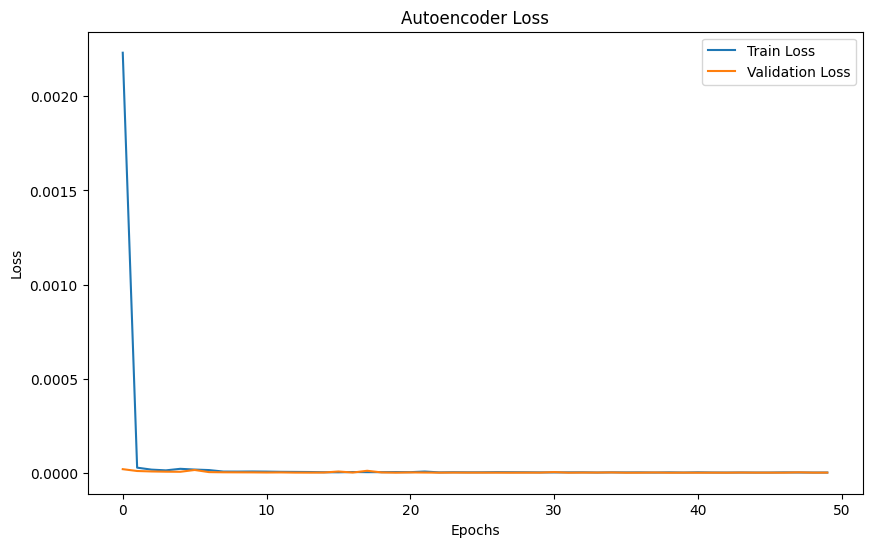

In [82]:
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test))

# Plot the loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

677/677 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Reconstruction Error: 92013     3.545483e-07
13391     1.274239e-07
52601     1.080114e-06
45755     4.261572e-07
100440    1.251113e-07
              ...     
87268     2.210211e-07
36055     5.027274e-06
72744     2.656695e-07
80933     3.218298e-06
57887     3.521743e-07
Length: 21657, dtype: float64
Accuracy: 0.44170476058549196
ROC-AUC: 0.4767815529876756
Confusion Matrix:
[[ 9232   749]
 [11342   334]]
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.92      0.60      9981
           1       0.31      0.03      0.05     11676

    accuracy                           0.44     21657
   macro avg       0.38      0.48      0.33     21657
weighted avg       0.37      0.44      0.31     21657



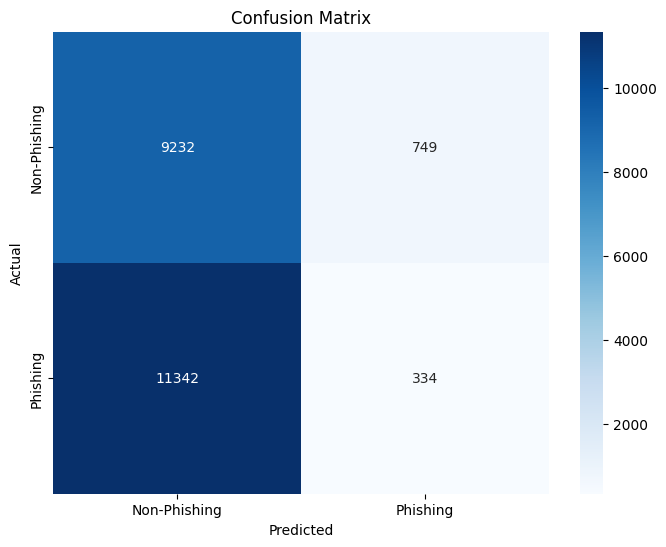

In [106]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import seaborn as sns

def evaluate_metrics(model, X_test):
    encoded_data = model.predict(X_test)
    reconstruction_error = np.mean(np.square(X_test - encoded_data), axis = 1)
    print(f'Reconstruction Error: {reconstruction_error}')
    # Accuracy, ROC-AUC, confusion metrics, precision 

    threshold = np.percentile(reconstruction_error, 95)  # Example threshold at the 95th percentile

    # Classify emails based on reconstruction error
    predictions = [1 if error > threshold else 0 for error in reconstruction_error]

    accuracy = accuracy_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    class_report = classification_report(y_test, predictions)

    # Print the evaluation metrics
    print(f'Accuracy: {accuracy}')
    print(f'ROC-AUC: {roc_auc}')
    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(class_report) 

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Non-Phishing', 'Phishing'], 
                yticklabels=['Non-Phishing', 'Phishing'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

evaluate_metrics(autoencoder, X_test)

### Tuning the Autoencoder

In [100]:
import keras_tuner as kt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

def build_autoencoder(hp, input_dim):
    input_layer = Input(shape=(input_dim,))
    
    # activation_function = hp.Choice('activation', ['relu', 'tanh', 'sigmoid', 'elu'])
    # Hyperparameters for layers
    encoded = Dense(hp.Int('units_1', min_value=32, max_value=256, step=32), activation='relu')(input_layer)
    encoded = Dense(hp.Int('units_2', min_value=16, max_value=128, step=16), activation='relu')(encoded)
    latent_space = Dense(hp.Int('latent_space_dim', min_value=8, max_value=64, step=8), activation='relu')(encoded)
    
    decoded = Dense(hp.Int('units_2', min_value=16, max_value=128, step=16), activation='relu')(latent_space)
    decoded = Dense(hp.Int('units_1', min_value=32, max_value=256, step=32), activation='relu')(decoded)
    output_layer = Dense(input_dim, activation='sigmoid')(decoded)

    model = Model(input_layer, output_layer)
    model.compile(optimizer='adam', loss='mse')
    return model

# Tuner setup
tuner = kt.Hyperband(lambda hp: build_autoencoder(hp, input_dim), 
                     objective='val_loss', 
                     max_epochs=50, 
                     factor=3, 
                     directory='my_dir', 
                     project_name='autoencoder_tuning')

# Search for the best hyperparameters
tuner.search(X_train, X_train, epochs=50, validation_data=(X_test, X_test))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]


Trial 84 Complete [00h 04m 53s]
val_loss: 8.094516488199588e-07

Best val_loss So Far: 5.27743964084948e-07
Total elapsed time: 01h 39m 49s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [110]:
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model_tuned = build_autoencoder(best_hp, input_dim)
history_tuned = best_model_tuned.fit(X_train, X_train, 
                         epochs=50,  # You can adjust the epochs based on your needs
                         batch_size=32, 
                         validation_data=(X_test, X_test))



Epoch 1/50
2707/2707 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0106 - val_loss: 2.8467e-05
Epoch 2/50
2707/2707 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 3.3446e-05 - val_loss: 1.4548e-05
Epoch 3/50
2707/2707 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2.0322e-05 - val_loss: 1.1557e-05
Epoch 4/50
2707/2707 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1.6965e-05 - val_loss: 6.5012e-06
Epoch 5/50
2707/2707 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 2.2776e-05 - val_loss: 5.6542e-06
Epoch 6/50
2707/2707 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.3390e-06 - val_loss: 5.6170e-06
Epoch 7/50
2707/2707 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1.5604e-05 - val_loss: 1.4463e-05
Epoch 8/50
2707/2707 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.6336e-05 - val_loss: 2.3575e-05
Epoch 9/50
2707/2707 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1.1560e-05 - val_loss: 6.1696e-06
Epoch 10/50
2707/2707 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.8752e-06 - val_loss: 2.4117e-06
Epoch 11/50
2707/2707 ━━━━━━━━━━━━━━━━━━━━

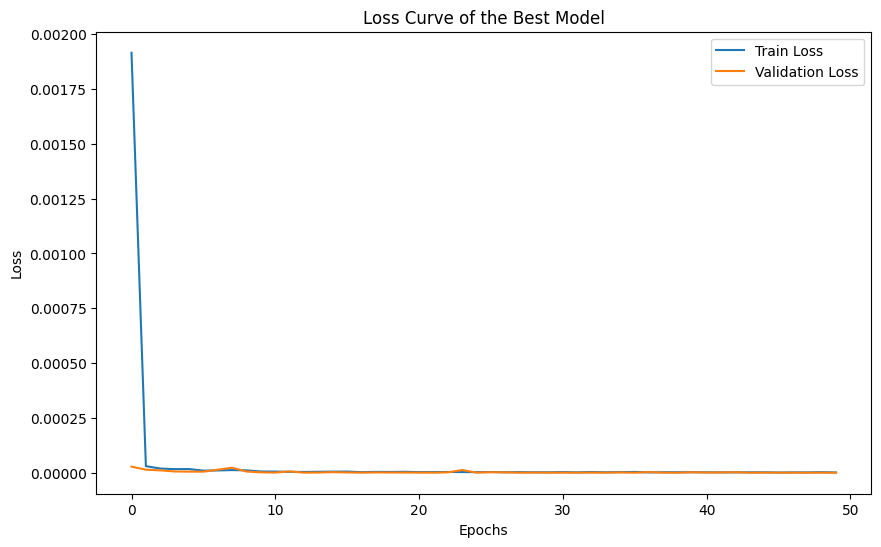

In [111]:
import matplotlib.pyplot as plt

def plot_loss_curve(history):
    # Plot the training and validation loss
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Curve of the Model')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss_curve(history_tuned)

Evaluate Model

677/677 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Reconstruction Error: 92013     2.524739e-07
13391     4.324721e-08
52601     8.004372e-07
45755     9.195902e-08
100440    3.924295e-08
              ...     
87268     1.038349e-07
36055     1.365131e-06
72744     2.232521e-07
80933     1.180351e-06
57887     1.241708e-08
Length: 21657, dtype: float64
Accuracy: 0.4469686475504456
ROC-AUC: 0.48207788271508256
Confusion Matrix:
[[ 9289   692]
 [11285   391]]
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.93      0.61      9981
           1       0.36      0.03      0.06     11676

    accuracy                           0.45     21657
   macro avg       0.41      0.48      0.33     21657
weighted avg       0.40      0.45      0.31     21657



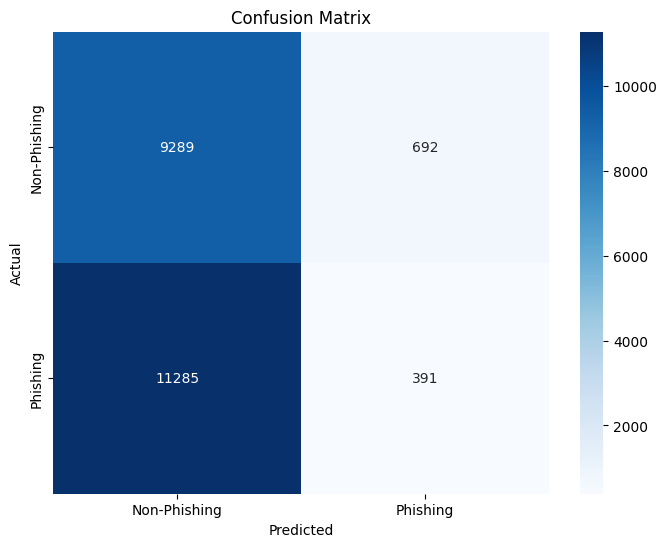

In [107]:
evaluate_metrics(best_model, X_test)